In [42]:
!pip install torch --upgrade

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (0.4.1)


In [0]:
import numpy as np

# Here we generate some fake data
def lin(w,b,x): 
  return w*x+b

def gen_fake_data(n, w, b):
    x = np.random.uniform(0,1,n) 
    y = lin(w,b,x) + 0.1 * np.random.normal(0,5,n)
    return x, y


w_true = 3.
b_true = 8.
x, y = gen_fake_data(100, w_true, b_true)

#just some reshaping to make pytorch happy (probably a more elegant way of doing this)
x = np.vstack(x)
x = np.array(x,dtype=np.float32)
y = np.vstack(y)
y = np.array(y,dtype=np.float32)


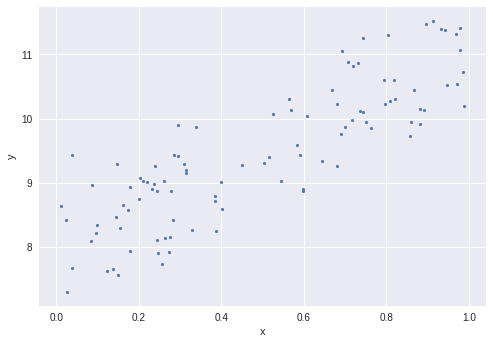

In [29]:
# Plotting our data
import matplotlib.pyplot as plt
plt.scatter(x,y, s=8); 
plt.xlabel("x"); 
plt.ylabel("y");

In [0]:
# loading the pytorch libraries
import torch.nn as nn
import torch

# A simple linear unit which defines our model
# PyTorch includes a weight for each input and also adds a bias term by default
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):
        # class super classes constructor
        super(LinearRegressionModel, self).__init__() 
        
        # simple linear unit
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        # performs 
        out = self.linear(x)
        return out



In [0]:
# our fake data only has 1 dimension for input and output
input_size = 1
output_size = 1

# how many times we iterate through the data
num_epochs = 2000

# controls how big of a step we take during gradient decent
learning_rate = 0.01



# Linear regression model
model = LinearRegressionModel(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


In [40]:
for epoch in range(num_epochs):
    
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x)
    targets = torch.from_numpy(y)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    
    # we have to zero out the gradients on each epoch
    optimizer.zero_grad() 
    
    # calculate the gradients
    loss.backward()
    
    # update the weight and bias
    optimizer.step()
    
    if( epoch == 0):
      print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    
    if (epoch+1) % 100 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/2000], Loss: 83.3641
Epoch [100/2000], Loss: 0.8395
Epoch [200/2000], Loss: 0.3139
Epoch [300/2000], Loss: 0.3104
Epoch [400/2000], Loss: 0.3102
Epoch [500/2000], Loss: 0.3100
Epoch [600/2000], Loss: 0.3099
Epoch [700/2000], Loss: 0.3098
Epoch [800/2000], Loss: 0.3097
Epoch [900/2000], Loss: 0.3097
Epoch [1000/2000], Loss: 0.3096
Epoch [1100/2000], Loss: 0.3096
Epoch [1200/2000], Loss: 0.3096
Epoch [1300/2000], Loss: 0.3095
Epoch [1400/2000], Loss: 0.3095
Epoch [1500/2000], Loss: 0.3095
Epoch [1600/2000], Loss: 0.3095
Epoch [1700/2000], Loss: 0.3095
Epoch [1800/2000], Loss: 0.3095
Epoch [1900/2000], Loss: 0.3095
Epoch [2000/2000], Loss: 0.3095


In [41]:
#print out the weight (w) and bias (b) 
for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, param.data)

linear.weight tensor([[3.0053]])
linear.bias tensor([7.9741])
